In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install finance-datareader

In [13]:
import random
import matplotlib.pyplot as plt
import datetime
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler

In [4]:
# 현재 시간으로부터 20년 전 날짜 계산
# start_date = datetime.datetime.now() - datetime.timedelta(days=365*20)
start_date = datetime.datetime.now() - datetime.timedelta(days=365)


df_kospi = fdr.DataReader('KS11', start_date) # KOSPI
df_kosdaq = fdr.DataReader('KQ11', start_date) # KOSDAQ
df_snp500 = fdr.DataReader('US500', start_date) # S&P500
df_nasdaq = fdr.DataReader('IXIC', start_date) # NASDAQ
df_dow = fdr.DataReader('DJI', start_date) # DOW JONES
df_vix = fdr.DataReader('VIX', start_date) # S&P500 VIX

print(df_kospi.head(3))
print(df_kosdaq.head(3))
print(df_snp500.head(3))
print(df_nasdaq.head(3))
print(df_dow.head(3))
print(df_vix.head(3))

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-03-25  2740.830078  2740.949951  2722.360107  2729.979980  2729.979980   
2022-03-28  2721.219971  2737.459961  2707.739990  2729.560059  2729.560059   
2022-03-29  2745.620117  2754.179932  2733.219971  2741.070068  2741.070068   

            Volume  
Date                
2022-03-25  599800  
2022-03-28  768000  
2022-03-29  726700  
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2022-03-25  936.940002  937.690002  933.090027  934.690002  934.690002  1600.0
2022-03-28  934.179993  934.179993  926.549988  927.109985  927.109985  1400.0
2022-03-29  932.859985  937.830017  930.340027  937.830017  937.830017  1500.0
                   Open         High          Low        Close    Adj Close  \
Date                     

In [17]:
# normalize
scaler = MinMaxScaler()
norm_kospi = pd.DataFrame(scaler.fit_transform(df_kospi), columns = df_kospi.columns)
norm_kosdaq = pd.DataFrame(scaler.fit_transform(df_kosdaq), columns = df_kosdaq.columns)
norm_snp500 = pd.DataFrame(scaler.fit_transform(df_snp500), columns = df_snp500.columns)
norm_nasdaq = pd.DataFrame(scaler.fit_transform(df_nasdaq), columns = df_nasdaq.columns)
norm_dow = pd.DataFrame(scaler.fit_transform(df_dow), columns = df_snp500.columns)
norm_vix = pd.DataFrame(scaler.fit_transform(df_vix), columns = df_vix.columns)

<Figure size 1000x1500 with 0 Axes>

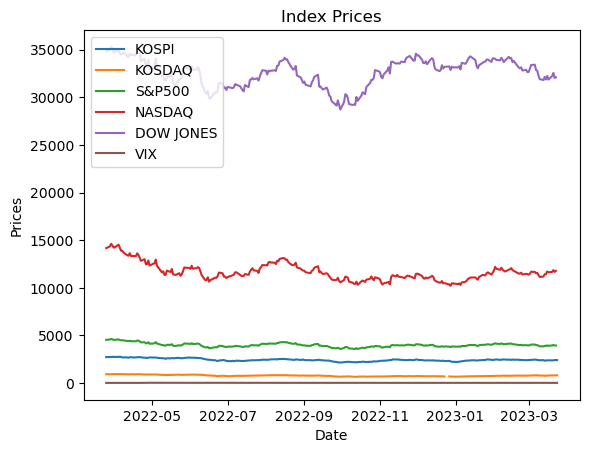

In [19]:
plt.figure(figsize=(10, 15))

_, ax = plt.subplots()

# 3. 여러개의 데이터 그리기
ax.plot(df_kospi.index, df_kospi['Close'], label='KOSPI')
ax.plot(df_kosdaq.index, df_kosdaq['Close'], label='KOSDAQ')
ax.plot(df_snp500.index, df_snp500['Close'], label='S&P500')
ax.plot(df_nasdaq.index, df_nasdaq['Close'], label='NASDAQ')
ax.plot(df_dow.index, df_dow['Close'], label='DOW JONES')
ax.plot(df_vix.index, df_vix['Close'], label='VIX')

# 4. 그래프 꾸미기
plt.title('Index Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend(loc='upper left')

# 5. 그래프 출력
plt.show()

<Figure size 1000x1500 with 0 Axes>

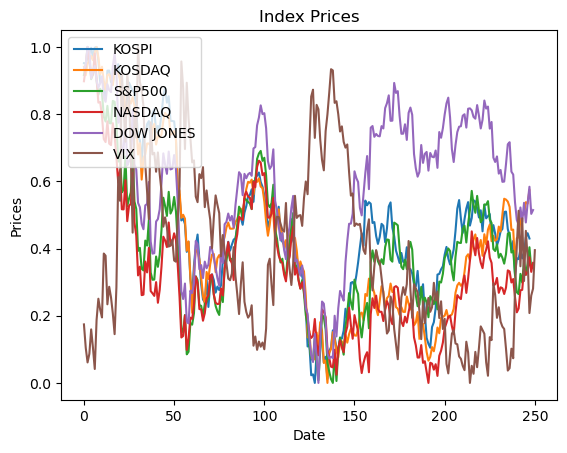

In [20]:
plt.figure(figsize=(10, 15))

_, ax = plt.subplots()

# 3. 여러개의 데이터 그리기
ax.plot(norm_kospi.index, norm_kospi['Close'], label='KOSPI')
ax.plot(norm_kosdaq.index, norm_kosdaq['Close'], label='KOSDAQ')
ax.plot(norm_snp500.index, norm_snp500['Close'], label='S&P500')
ax.plot(norm_nasdaq.index, norm_nasdaq['Close'], label='NASDAQ')
ax.plot(norm_dow.index, norm_dow['Close'], label='DOW JONES')
ax.plot(norm_vix.index, norm_vix['Close'], label='VIX')

# 4. 그래프 꾸미기
plt.title('Index Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend(loc='upper left')

# 5. 그래프 출력
plt.show()